### Regression Evaluation

In [ ]:
#Irfan Noordin
#4:00 PM
# defining X & y
#X = df.drop(columns = ['MEDV'])
#y = df["MEDV"]

In [1]:
# Core libraries
import pandas as pd
from sklearn.datasets import load_boston
# Sklearn processing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Sklearn regression algorithms
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

# Sklearn regression model evaluation functions
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# information on the data
data = load_boston()
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
# Loading the data into a 
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MEDV'] = data.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


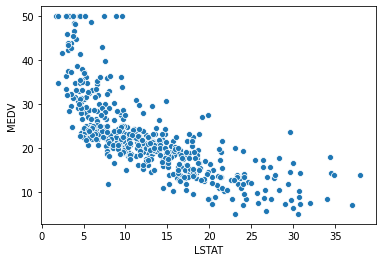

In [4]:
sns.scatterplot(x='LSTAT', y='MEDV', data=df)

In [5]:
# defining X & y
X = df[["LSTAT"]]
y = df["MEDV"]

## Splitting data into Train Test Split 
- This is a common practice to enable training and testing on the data. 
- This is done so that we can test the effectiveness of the model on data which has not been seen by the model 


In [6]:
# Split into train (2/3) and test (1/3) sets
test_size = 0.33
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

### Visualizing Test and Train data split for better understanding

In [7]:
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

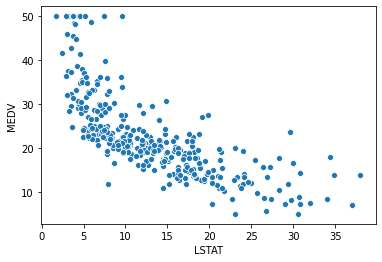

In [8]:
sns.scatterplot(x='LSTAT', y='MEDV', data=train)

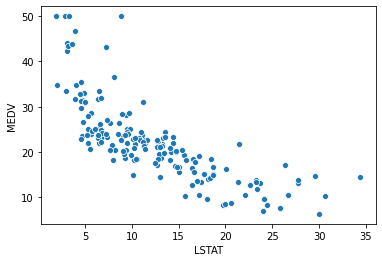

In [9]:
sns.scatterplot(x='LSTAT', y='MEDV', data=test)

## Building and Testing Machine Learning Models 

### With Train data

In [10]:
# Build Linear Regression Model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
predictions_lr = model_lr.predict(X_train)


In [11]:
# View results on train data 
print('Linear Regression')
print("MAE", mean_absolute_error(y_train, predictions_lr))
print("RMSE", sqrt(mean_squared_error(y_train, predictions_lr)))
print("R2", r2_score(y_train, predictions_lr))

Linear Regression
MAE 4.7754176891173215
RMSE 6.430995387503733
R2 0.5331393232617768


### Prediction on Test data 

In [12]:
predictions_lr = model_lr.predict(X_test)
# View results on test data 
print('Linear Regression')
print("MAE", mean_absolute_error(y_test, predictions_lr))
print("RMSE", sqrt(mean_squared_error(y_test, predictions_lr)))
print("R2", r2_score(y_test, predictions_lr))

Linear Regression
MAE 4.225229525398441
RMSE 5.744164272956162
R2 0.5651945584887861


### Exercise 1 
- Train and Test the Machine Learning Model with the KNeighborsRegressor() 
    - Compare the results with the Linear Regression Model
        - Results on Train data 
        - Results on Test data

In [13]:
from sklearn.neighbors import KNeighborsRegressor

In [21]:
# Build KNN Model
#model_knn = KNeighborsRegressor(n_neighbors=2)
model_knn = KNeighborsRegressor()
model_knn.fit(X_train, y_train)
predictions_knn = model_knn.predict(X_train)


In [22]:
# View results on train data 
print('KNeighborsRegressor')
print("MAE", mean_absolute_error(y_train, predictions_knn))
print("RMSE", sqrt(mean_squared_error(y_train, predictions_knn)))
print("R2", r2_score(y_train, predictions_knn))

KNeighborsRegressor
MAE 3.661120943952802
RMSE 4.888942915585987
R2 0.7301882667743216


In [23]:
predictions_knn = model_knn.predict(X_test)


# View results on test data 
print('Linear Regression')
print("MAE", mean_absolute_error(y_test, predictions_knn))
print("RMSE", sqrt(mean_squared_error(y_test, predictions_knn)))
print("R2", r2_score(y_test, predictions_knn))

Linear Regression
MAE 3.920239520958083
RMSE 5.54102954181202
R2 0.5954034280143347


References: 
- https://openclassrooms.com/en/courses/6401081-improve-the-performance-of-a-machine-learning-model/6519016-evaluate-the-performance-of-a-regression-model

- https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/
- https://machinelearningmastery.com/how-to-know-if-your-machine-learning-model-has-good-performance/

In [24]:
# multi

# defining X & y

X_baru = df.drop(columns = ['MEDV'])
y = df["MEDV"]

In [25]:
# Split into train (2/3) and test (1/3) sets
test_size = 0.33
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X_baru, y, test_size=test_size, random_state=seed)

In [26]:
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

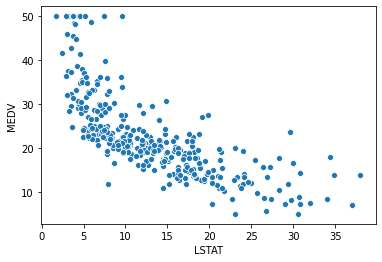

In [31]:
sns.scatterplot(x='LSTAT', y='MEDV', data=train)

In [27]:
model_knn = KNeighborsRegressor()
model_knn.fit(X_train, y_train)
predictions_knn = model_knn.predict(X_train)

In [28]:
# View results on train data 
print('KNeighborsRegressor')
print("MAE", mean_absolute_error(y_train, predictions_knn))
print("RMSE", sqrt(mean_squared_error(y_train, predictions_knn)))
print("R2", r2_score(y_train, predictions_knn))

KNeighborsRegressor
MAE 3.6359292035398227
RMSE 5.352897045961258
R2 0.6765488644938598


In [30]:
predictions_knn = model_knn.predict(X_test)


# View results on test data 
print('Linear Regression')
print("MAE", mean_absolute_error(y_test, predictions_knn))
print("RMSE", sqrt(mean_squared_error(y_test, predictions_knn)))
print("R2", r2_score(y_test, predictions_knn))

Linear Regression
MAE 4.23940119760479
RMSE 5.872843214759755
R2 0.5454956112171632
